# Introduction

QA plots for the generic vetex finding and DCA performance

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.jp-CodeMirrorEditor').hide(); // for newer versions of nbviewer.org
 } else {
 $('div.input').show();
 $('div.jp-CodeMirrorEditor').show(); // for newer versions of nbviewer.org
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
import os.path

# readme file of the macros, available if run under JenkinsCI
# https://github.com/sPHENIX-Collaboration/utilities/blob/master/jenkins/built-test/test-tracking-qa.sh 

macro_markdown = 'Fun4All-macros-README.md'

if os.path.isfile(macro_markdown) :
    with open(macro_markdown, 'r') as file:
        display(Markdown(file.read()))

[//]: # (This section starts with a 2nd level heading and get embedded in the result QA report at https://github.com/sPHENIX-Collaboration/QA-gallery/tree/QA-tracking-low-occupancy)

## Tracking QA at low occupancy

Low occupancy tracking QA concists full tracker + reconstruction of events with 20 $\pi^+$,  20 $\pi^-$ and one $\Upsilon(1S) \rightarrow e^+ e^-$. Please note the calorimeters are disabled to improve execution speed, which also removed some of the correlated albedo background for the tracker. 

The source code of the macro can be found at https://github.com/sPHENIX-Collaboration/macros/tree/QA-tracking-low-occupancy or [comparing it to the master branch](https://github.com/sPHENIX-Collaboration/macros/compare/QA-tracking-low-occupancy?expand=1).


## `pyROOT` env check

In [4]:
import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

Welcome to JupyROOT 6.26/06


via sPHENIX software distribution at `/var/lib/jenkins/workspace/sPHENIX/Build-Master-gcc12@4/build/new/install.1`

## Plotting source code

In [5]:
import subprocess

try:
    git_url = \
        subprocess.run(['git','remote','get-url','origin'], stdout=subprocess.PIPE)\
        .stdout.decode('utf-8').strip()\
        .replace('git@github.com:','https://github.com/')

    display(Markdown(f"View the source code repository at {git_url}"))
except: # catch *all* exceptions
    #     well do nothing
    pass

View the source code repository at https://github.com/sPHENIX-Collaboration/QA-gallery.git

## JenkinsCI information (if available)

In [6]:
display(Markdown('Some further details about the QA run, if executed under the Jenkins CI:'))

checkrun_repo_commit = os.getenv("checkrun_repo_commit")
if checkrun_repo_commit is not None:
    display(Markdown(f"* The commit being checked is {checkrun_repo_commit}"))
        
ghprbPullLink = os.getenv("ghprbPullLink")
if ghprbPullLink is not None:
    display(Markdown(f"* Link to the pull request: {ghprbPullLink}"))

BUILD_URL =  os.getenv("BUILD_URL")
if BUILD_URL is not None:
    display(Markdown(f"* Link to the build: {BUILD_URL}"))

git_url_macros =  os.getenv("git_url_macros")
sha_macros =  os.getenv("sha_macros")
if git_url_macros is not None:
    display(Markdown(f"* Git repo for macros: {git_url_macros} , which merges `{sha_macros}` and the QA tracking branch"))

RUN_ARTIFACTS_DISPLAY_URL = os.getenv("RUN_ARTIFACTS_DISPLAY_URL")
if RUN_ARTIFACTS_DISPLAY_URL is not None:
    display(Markdown(f"* Download the QA ROOT files: {RUN_ARTIFACTS_DISPLAY_URL}"))

JENKINS_URL  = os.getenv("JENKINS_URL")
if JENKINS_URL is not None:
    display(Markdown(f"Automatically generated by [sPHENIX Jenkins continuous integration]({JENKINS_URL}) [![sPHENIX](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/sphenix-logo-white-bg-72p.png)](https://www.sphenix.bnl.gov/web/) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [![jenkins.io](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/jenkins_logo_title-72p.png)](https://jenkins.io/)"))

Some further details about the QA run, if executed under the Jenkins CI:

* The commit being checked is sPHENIX-Collaboration/coresoftware/2c7a00b1d292f79afb480224d6daecbcfa5f4074

* Link to the pull request: https://github.com/sPHENIX-Collaboration/coresoftware/pull/1930

* Link to the build: https://web.sdcc.bnl.gov/jenkins-sphenix/job/sPHENIX/job/test-tracking-low-occupancy-qa/3382/

* Git repo for macros: https://github.com/sPHENIX-Collaboration/macros.git , which merges `master` and the QA tracking branch

* Download the QA ROOT files: https://web.sdcc.bnl.gov/jenkins-sphenix/job/sPHENIX/job/test-tracking-low-occupancy-qa/3382/display/redirect?page=artifacts

Automatically generated by [sPHENIX Jenkins continuous integration](https://web.sdcc.bnl.gov/jenkins-sphenix/) [![sPHENIX](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/sphenix-logo-white-bg-72p.png)](https://www.sphenix.bnl.gov/web/) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [![jenkins.io](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/jenkins_logo_title-72p.png)](https://jenkins.io/)


# Initialization

In [7]:
%%cpp -d

#include "QA_Draw_Utility.C"

#include <sPhenixStyle.C>

#include <TFile.h>
#include <TLine.h>
#include <TString.h>
#include <TTree.h>
#include <cassert>
#include <cmath>

In [8]:
%%cpp

SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");

// test sPHENIX lib load
// gSystem->Load("libg4eval.so");

// test libs
// gSystem->ListLibraries();

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [9]:
%jsroot on

## Inputs and file checks

In [10]:

qa_file_name_new = os.getenv("qa_file_name_new")
if qa_file_name_new is None:
#     qa_file_name_new = "G4sPHENIX_test-tracking-low-occupancy-qa_Event100_Sum10_qa.root"
    qa_file_name_new = "G4sPHENIX_test-tracking_Event1000_Sum16_qa.root"
    display(Markdown(f"`qa_file_name_new` env not set. use the default `qa_file_name_new={qa_file_name_new}`"))

qa_file_name_ref = os.getenv("qa_file_name_ref")
if qa_file_name_ref is None:
    qa_file_name_ref = "G4sPHENIX_test-tracking_Event1000_Sum16_qa.root"
#     qa_file_name_ref = "reference/G4sPHENIX_test-tracking-low-occupancy-qa_Event100_Sum10_qa.root"
    display(Markdown(f"`qa_file_name_ref` env not set. use the default `qa_file_name_ref={qa_file_name_ref}`"))
elif qa_file_name_ref == 'None':
    qa_file_name_ref = None
    display(Markdown(f"`qa_file_name_ref` = None and we are set to not to use the reference histograms"))
    


In [11]:
# qa_file_new = ROOT.TFile.Open(qa_file_name_new);

# assert qa_file_new.IsOpen()
# qa_file_new.ls()
display(Markdown(f"Openning QA file at `{qa_file_name_new}`"))
ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_new = new TFile(\"{qa_file_name_new}\");")
ROOT.gInterpreter.ProcessLine(f"const char * qa_file_name_new = \"{qa_file_name_new}\";")

if qa_file_name_ref is not None:
#     qa_file_ref = ROOT.TFile.Open(qa_file_name_ref);

#     assert qa_file_ref.IsOpen()
    display(Markdown(f"Openning QA reference file at `{qa_file_name_ref}`"))
    ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_ref = new TFile(\"{qa_file_name_ref}\");")
    ROOT.gInterpreter.ProcessLine(f"const char *  qa_file_name_ref = \"{qa_file_name_ref}\";")
else:
    ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_ref = nullptr;")
    ROOT.gInterpreter.ProcessLine(f"const char *  qa_file_name_ref = nullptr;")


Openning QA file at `G4sPHENIX_test-tracking_Event500_Sum30_qa.root`

Openning QA reference file at `reference/G4sPHENIX_test-tracking_Event500_Sum30_qa.root`

In [12]:
%%cpp

if (qa_file_new == nullptr) 
{
    cout <<"Error, can not open QA root file"<<qa_file_name_new<<endl;
    // exit(1);
}

# DCA performance

Per-track DCA performance

## Transverse DCA, $DCA_{r\phi}$

First without track selection cuts, which included many track that do not have good MVTX matches

In [13]:
%%cpp
{
    const char *hist_name_prefix = "QAG4SimulationTracking";
    TString prefix = TString("h_") + hist_name_prefix + TString("_");

    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;
    
  TH2 *h_new = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("DCArPhi_pT"), "TH2");
  assert(h_new);

  //  h_new->Rebin(1, 2);
  //h_new->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref = NULL;
  if (qa_file_ref)
  {
    h_ref = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("DCArPhi_pT"), "TH2");
    assert(h_ref);

    //    h_ref->Rebin(1, 2);
    //h_ref->Sumw2();
    h_ref->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Tracking_DCArPhi") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_DCArPhi") + TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  vector<pair<double, double>> gpt_ranges{
      {0, 0.5},
      {0.5, 1},
      {1, 1.5},
      {1.5, 2},
      {2, 4},
      {4, 16},
      {16, 40}};

  TF1 *f1 = nullptr;
  TF1 *fit = nullptr;
  Double_t sigma = 0;
  Double_t sigma_unc = 0;
  char resstr[500];
  TLatex *res = nullptr;
  for (auto pt_range : gpt_ranges)
  {
    //cout << __PRETTY_FUNCTION__ << " process " << pt_range.first << " - " << pt_range.second << " GeV/c";

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new->GetXaxis()->FindBin(pt_range.first + epsilon);
    const int bin_end = h_new->GetXaxis()->FindBin(pt_range.second - epsilon);

    TH1 *h_proj_new = h_new->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new->GetName(), bin_start, bin_end),
        bin_start, bin_end);
    if (pt_range.first < 2.0)
    {
      h_proj_new->GetXaxis()->SetRangeUser(-.05,.05);
      h_proj_new->Rebin(5);
    }
    else
    {
      h_proj_new->GetXaxis()->SetRangeUser(-.01,.01);
    }
    h_proj_new->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f GeV/c", pt_range.first, pt_range.second));
    h_proj_new->GetXaxis()->SetTitle(TString::Format(
        "DCA (r #phi) [cm]"));
    h_proj_new->GetXaxis()->SetNdivisions(5,5);
    f1 = new TF1("f1","gaus",-.01,.01);
    h_proj_new->Fit(f1,"qm");
    sigma = f1->GetParameter(2);
    sigma_unc = f1->GetParError(2);

    TH1 *h_proj_ref = nullptr;
    if (h_ref)
    {
      h_proj_ref =
          h_ref->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new->GetName(), bin_start, bin_end),
              bin_start, bin_end);
      if (pt_range.first < 2.0)
      {
	//h_proj_ref->GetXaxis()->SetRangeUser(-.05,.05);
	h_proj_ref->Rebin(5);
      }
    }
    
    DrawReference(h_proj_new, h_proj_ref);

    sprintf(resstr,"#sigma = %.5f #pm %.5f cm", sigma, sigma_unc);
    res = new TLatex(0.325,0.825,resstr);
    res->SetNDC();
    res->SetTextSize(0.05);
    res->SetTextAlign(13);
    res->Draw();
  }
  p = (TPad *) c1->cd(idx++);
  c1->Update();
  TPaveText *pt = new TPaveText(.05,.1,.95,.8);
  pt->AddText("No cuts");
  pt->Draw();

  //SaveCanvas(c1, TString(qa_file_name_new) + TString("_") + TString(c1->GetName()), true);



    c1->Draw();
}

KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))


Next, with cuts on minimal tracker hits as defined in `QAG4SimulationTracking` and denoted on plot

In [14]:
%%cpp
{
    const char *hist_name_prefix = "QAG4SimulationTracking";
    TString prefix = TString("h_") + hist_name_prefix + TString("_");

    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;
    
  TH2 *h_new2 = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("DCArPhi_pT_cuts"), "TH2");
  assert(h_new2);

  //  h_new->Rebin(1, 2);
  //h_new2->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref2 = NULL;
  if (qa_file_ref)
  {
    h_ref2 = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("DCArPhi_pT_cuts"), "TH2");
    assert(h_ref2);

    //    h_ref->Rebin(1, 2);
    //h_ref2->Sumw2();
    h_ref2->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c2 = new TCanvas(TString("QA_Draw_Tracking_DCArPhi2") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_DCArPhi2") + TString("_") + hist_name_prefix,
                            950, 600);
  c2->Divide(4, 2);
  int idx2 = 1;
  TPad *p2;

  vector<pair<double, double>> gpt_ranges2{
      {0, 0.5},
      {0.5, 1},
      {1, 1.5},
      {1.5, 2},
      {2, 4},
      {4, 16},
      {16, 40}};
  TF1 *f2 = nullptr;
  TF1 *fit2 = nullptr;
  Double_t sigma2 = 0;
  Double_t sigma_unc2 = 0;
  char resstr2[500];
  TLatex *res2 = nullptr;
  for (auto pt_range : gpt_ranges2)
  {
    //cout << __PRETTY_FUNCTION__ << " process " << pt_range.first << " - " << pt_range.second << " GeV/c";

    p2 = (TPad *) c2->cd(idx2++);
    c2->Update();
    p2->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new2->GetXaxis()->FindBin(pt_range.first + epsilon);
    const int bin_end = h_new2->GetXaxis()->FindBin(pt_range.second - epsilon);

    TH1 *h_proj_new2 = h_new2->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new2->GetName(), bin_start, bin_end),
        bin_start, bin_end);
    if (pt_range.first < 2.0)
    {
      h_proj_new2->GetXaxis()->SetRangeUser(-.05,.05);
      h_proj_new2->Rebin(5);
    }
    else
    {
      h_proj_new2->GetXaxis()->SetRangeUser(-.01,.01);
    }
    h_proj_new2->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f GeV/c", pt_range.first, pt_range.second));
    h_proj_new2->GetXaxis()->SetTitle(TString::Format(
        "DCA (r #phi) [cm]"));
    h_proj_new2->GetXaxis()->SetNdivisions(5,5);
    f2 = new TF1("f2","gaus",-.01,.01);
    h_proj_new2->Fit(f2 , "mq");
    sigma2 = f2->GetParameter(2);
    sigma_unc2 = f2->GetParError(2);

    TH1 *h_proj_ref2 = nullptr;
    if (h_ref2)
    {
      h_proj_ref2 =
          h_ref2->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new2->GetName(), bin_start, bin_end),
              bin_start, bin_end);
      if (pt_range.first < 2.0)
      {
	//h_proj_ref->GetXaxis()->SetRangeUser(-.05,.05);
	h_proj_ref2->Rebin(5);
      }
    }
    DrawReference(h_proj_new2, h_proj_ref2);

    sprintf(resstr2,"#sigma = %.5f #pm %.5f cm", sigma2, sigma_unc2);
    res2 = new TLatex(0.325,0.825,resstr2);
    res2->SetNDC();
    res2->SetTextSize(0.05);
    res2->SetTextAlign(13);
    res2->Draw();
  }
    
    
  p2 = (TPad *) c2->cd(idx2++);
  c2->Update();
  TPaveText *pt2 = new TPaveText(.05,.1,.95,.8);
  pt2->AddText("Cuts: MVTX hits>=2, INTT hits>=1,");
  pt2->AddText("TPC hits>=20");
  pt2->Draw();

  //SaveCanvas(c2, TString(qa_file_name_new) + TString("_") + TString(c2->GetName()), true);

    c2->Draw();
}

KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))


## Longitudinal DCA, $DCA_z$

Start with the version without track quality cuts

In [15]:
%%cpp

{
    const char *hist_name_prefix = "QAG4SimulationTracking";
      TString prefix = TString("h_") + hist_name_prefix + TString("_");

    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  if (qa_file_new)
  {
    TH1 *h_norm = (TH1 *) qa_file_new->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Truth Track"));
  }
  if (qa_file_ref)
  {
    TH1 *h_norm = (TH1 *) qa_file_ref->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Truth Track"));
  }

  TH2 *h_new = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("DCAZ_pT"), "TH2");
  assert(h_new);

  //  h_new->Rebin(1, 2);
  //h_new->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref = NULL;
  if (qa_file_ref)
  {
    h_ref = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("DCAZ_pT"), "TH2");
    assert(h_ref);

    //    h_ref->Rebin(1, 2);
   // h_ref->Sumw2();
    h_ref->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Tracking_DCAZ") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_DCAZ") + TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  vector<pair<double, double>> gpt_ranges{
      {0, 0.5},
      {0.5, 1},
      {1, 1.5},
      {1.5, 2},
      {2, 4},
      {4, 16},
      {16, 40}};
  TF1 *f1 = nullptr;
  TF1 *fit = nullptr;
  Double_t sigma = 0;
  Double_t sigma_unc = 0;
  char resstr[500];
  TLatex *res = nullptr;
  for (auto pt_range : gpt_ranges)
  {
    //cout << __PRETTY_FUNCTION__ << " process " << pt_range.first << " - " << pt_range.second << " GeV/c";

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new->GetXaxis()->FindBin(pt_range.first + epsilon);
    const int bin_end = h_new->GetXaxis()->FindBin(pt_range.second - epsilon);

    TH1 *h_proj_new = h_new->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new->GetName(), bin_start, bin_end),
        bin_start, bin_end);
    if (pt_range.first < 2.0)
    {
      h_proj_new->GetXaxis()->SetRangeUser(-.05, .05);
      h_proj_new->Rebin(5);
    }
    else
    {
      h_proj_new->GetXaxis()->SetRangeUser(-.01, .01);
    }
    h_proj_new->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f GeV/c", pt_range.first, pt_range.second));
    h_proj_new->GetXaxis()->SetTitle(TString::Format(
        "DCA (Z) [cm]"));
    h_proj_new->GetXaxis()->SetNdivisions(5, 5);

    f1 = new TF1("f1", "gaus", -.01, .01);
    h_proj_new->Fit(f1,"mq");
    sigma = f1->GetParameter(2);
    sigma_unc = f1->GetParError(2);

    TH1 *h_proj_ref = nullptr;
    if (h_ref)
    {
      h_proj_ref =
          h_ref->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new->GetName(), bin_start, bin_end),
              bin_start, bin_end);
      if (pt_range.first < 2.0)
      {
        //h_proj_ref->GetXaxis()->SetRangeUser(-.05,.05);
        h_proj_ref->Rebin(5);
      }
    }
    DrawReference(h_proj_new, h_proj_ref);
    sprintf(resstr, "#sigma = %.5f #pm %.5f cm", sigma, sigma_unc);
    res = new TLatex(0.325, 0.825, resstr);
    res->SetNDC();
    res->SetTextSize(0.05);
    res->SetTextAlign(13);
    res->Draw();
  }
  p = (TPad *) c1->cd(idx++);
  c1->Update();
  TPaveText *pt = new TPaveText(.05, .1, .95, .8);
  pt->AddText("No cuts");
  pt->Draw();

//  SaveCanvas(c1, TString(qa_file_name_new) + TString("_") + TString(c1->GetName()), true);
    
    c1->Draw();
}

KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))


with cuts on minimal hits on each of the trackers

In [16]:
%%cpp

{
    
    const char *hist_name_prefix = "QAG4SimulationTracking";
      TString prefix = TString("h_") + hist_name_prefix + TString("_");

    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;
    
  // cuts plots
  TH2 *h_new2 = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("DCAZ_pT_cuts"), "TH2");
  assert(h_new2);

  //  h_new->Rebin(1, 2);
  //h_new2->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref2 = NULL;
  if (qa_file_ref)
  {
    h_ref2 = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("DCAZ_pT_cuts"), "TH2");
    assert(h_ref2);

    //    h_ref->Rebin(1, 2);
    //h_ref2->Sumw2();
    h_ref2->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c2 = new TCanvas(TString("QA_Draw_Tracking_DCAZ2") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_DCAZ2") + TString("_") + hist_name_prefix,
                            950, 600);
  c2->Divide(4, 2);
  int idx2 = 1;
  TPad *p2;

  vector<pair<double, double>> gpt_ranges2{
      {0, 0.5},
      {0.5, 1},
      {1, 1.5},
      {1.5, 2},
      {2, 4},
      {4, 16},
      {16, 40}};
  TF1 *f2 = nullptr;
  TF1 *fit2 = nullptr;
  Double_t sigma2 = 0;
  Double_t sigma_unc2 = 0;
  char resstr2[500];
  TLatex *res2 = nullptr;
  for (auto pt_range : gpt_ranges2)
  {
    //cout << __PRETTY_FUNCTION__ << " process " << pt_range.first << " - " << pt_range.second << " GeV/c";

    p2 = (TPad *) c2->cd(idx2++);
    c2->Update();
    p2->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new2->GetXaxis()->FindBin(pt_range.first + epsilon);
    const int bin_end = h_new2->GetXaxis()->FindBin(pt_range.second - epsilon);

    TH1 *h_proj_new2 = h_new2->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new2->GetName(), bin_start, bin_end),
        bin_start, bin_end);
    if (pt_range.first < 2.0)
    {
      h_proj_new2->GetXaxis()->SetRangeUser(-.05, .05);
      h_proj_new2->Rebin(5);
    }
    else
    {
      h_proj_new2->GetXaxis()->SetRangeUser(-.01, .01);
    }
    h_proj_new2->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                          ": %.1f - %.1f GeV/c", pt_range.first, pt_range.second));
    h_proj_new2->GetXaxis()->SetTitle(TString::Format(
        "DCA (Z) [cm]"));
    h_proj_new2->GetXaxis()->SetNdivisions(5, 5);

    f2 = new TF1("f2", "gaus", -.01, .01);
    h_proj_new2->Fit(f2,"mq");
    sigma2 = f2->GetParameter(2);
    sigma_unc2 = f2->GetParError(2);

    TH1 *h_proj_ref2 = nullptr;
    if (h_ref2)
    {
      h_proj_ref2 =
          h_ref2->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new2->GetName(), bin_start, bin_end),
              bin_start, bin_end);
      if (pt_range.first < 2.0)
      {
        //h_proj_ref->GetXaxis()->SetRangeUser(-.05,.05);
        h_proj_ref2->Rebin(5);
      }
    }
    DrawReference(h_proj_new2, h_proj_ref2);
    sprintf(resstr2, "#sigma = %.5f #pm %.5f cm", sigma2, sigma_unc2);
    res2 = new TLatex(0.325, 0.825, resstr2);
    res2->SetNDC();
    res2->SetTextSize(0.05);
    res2->SetTextAlign(13);
    res2->Draw();
  }
  p2 = (TPad *) c2->cd(idx2++);
  c2->Update();
  TPaveText *pt2 = new TPaveText(.05, .1, .95, .8);
  pt2->AddText("Cuts: MVTX hits>=2, INTT hits>=1,");
  pt2->AddText("TPC hits>=20");
  pt2->Draw();

//  SaveCanvas(c2, TString(qa_file_name_new) + TString("_") + TString(c2->GetName()), true);
    c2->Draw();
}

KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))


In [17]:
%jsroot off

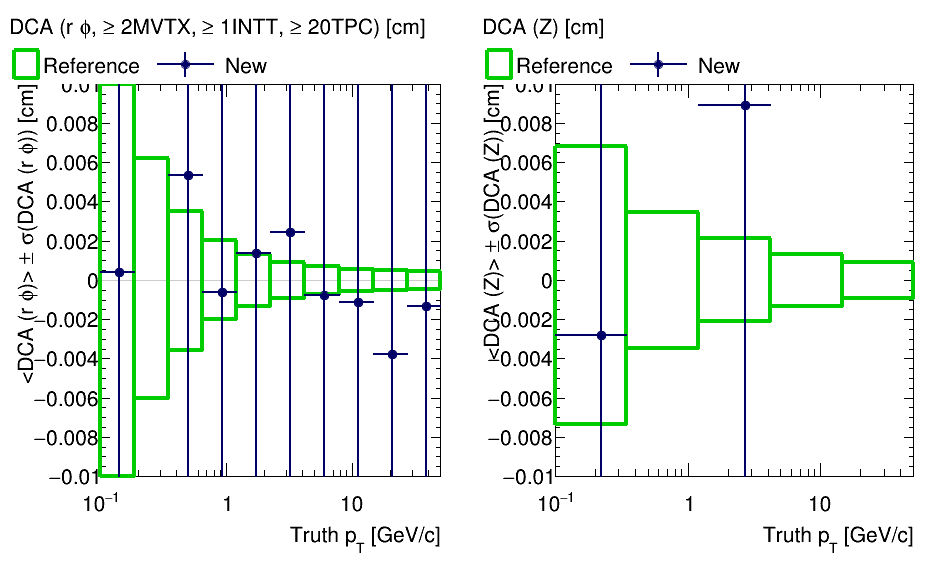

In [18]:
%%cpp

{
    const char *hist_name_prefix = "QAG4SimulationTracking";
    TString prefix = TString("h_") + hist_name_prefix + TString("_");
    
    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  if (qa_file_new)
  {

    TH1 *h_norm = (TH1 *) qa_file_new->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
  }
  if (qa_file_ref)
  {
    TH1 *h_norm = (TH1 *) qa_file_ref->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
  }

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Tracking_DCA_Resolution") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_DCA_Resolution") + TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(2, 1);
  int idx = 1;
  TPad *p;

  {
    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogx();
    TH1 *frame = p->DrawFrame(0.1, -0.01, 50, 0.01,
                              ";Truth p_{T} [GeV/c];<DCA (r #phi)> #pm #sigma(DCA (r #phi)) [cm]");
    gPad->SetLeftMargin(.2);
    frame->GetYaxis()->SetTitleOffset(2);
    TLine *l = new TLine(0.1, 0, 50, 0);
    l->SetLineColor(kGray);
    l->Draw();

    TH2 *h_QAG4SimulationTracking_DCArPhi = (TH2 *) qa_file_new->GetObjectChecked(
        prefix + "DCArPhi_pT_cuts", "TH2");
    assert(h_QAG4SimulationTracking_DCArPhi);

    h_QAG4SimulationTracking_DCArPhi->Rebin2D(20, 1);

    // h_QAG4SimulationTracking_DCArPhi->Draw("colz");
    TGraphErrors *ge_QAG4SimulationTracking_DCArPhi = FitProfile(h_QAG4SimulationTracking_DCArPhi);
    ge_QAG4SimulationTracking_DCArPhi->Draw("pe");

    TGraphErrors *h_ratio_ref = NULL;
    if (qa_file_ref)
    {
      TH2 *h_QAG4SimulationTracking_DCArPhi = (TH2 *) qa_file_ref->GetObjectChecked(
          prefix + "DCArPhi_pT_cuts", "TH2");
      assert(h_QAG4SimulationTracking_DCArPhi);

      h_QAG4SimulationTracking_DCArPhi->Rebin2D(20, 1);

      h_ratio_ref = FitProfile(h_QAG4SimulationTracking_DCArPhi);
      ge_QAG4SimulationTracking_DCArPhi->Draw("pe");
    }

    ge_QAG4SimulationTracking_DCArPhi->SetTitle("DCA (r #phi, #geq 2MVTX, #geq 1INTT, #geq 20TPC) [cm]");
    DrawReference(ge_QAG4SimulationTracking_DCArPhi, h_ratio_ref, true);
      
  }

  {
    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogx();
    TH1 *frame = p->DrawFrame(0.1, -0.01, 50, 0.01,
                              "DCA (Z) [cm];Truth p_{T} [GeV/c];<DCA (Z)> #pm #sigma(DCA (Z)) [cm]");
    // gPad->SetLeftMargin(.2);
    gPad->SetTopMargin(-1);
    frame->GetYaxis()->SetTitleOffset(1.7);
    //TLine *l = new TLine(0.1, 0, 50, 0);
    //l->SetLineColor(kGray);
    //l->Draw();
    HorizontalLine(gPad, 1)->Draw();

    TH2 *h_QAG4SimulationTracking_DCAZ = (TH2 *) qa_file_new->GetObjectChecked(
        prefix + "DCAZ_pT_cuts", "TH2");
    assert(h_QAG4SimulationTracking_DCAZ);

    h_QAG4SimulationTracking_DCAZ->Rebin2D(40, 1);

    TGraphErrors *ge_QAG4SimulationTracking_DCAZ = FitProfile(h_QAG4SimulationTracking_DCAZ);
    ge_QAG4SimulationTracking_DCAZ->Draw("pe");
    ge_QAG4SimulationTracking_DCAZ->SetTitle("DCA (Z) [cm]");

    TGraphErrors *h_ratio_ref = NULL;
    if (qa_file_ref)
    {
      TH2 *h_QAG4SimulationTracking_DCAZ = (TH2 *) qa_file_ref->GetObjectChecked(
          prefix + "DCAZ_pT_cuts", "TH2");
      assert(h_QAG4SimulationTracking_DCAZ);

      h_QAG4SimulationTracking_DCAZ->Rebin2D(40, 1);

      h_ratio_ref = FitProfile(h_QAG4SimulationTracking_DCAZ);
      ge_QAG4SimulationTracking_DCAZ->Draw("pe");
    }

    DrawReference(ge_QAG4SimulationTracking_DCAZ, h_ratio_ref, true);
  }

  //SaveCanvas(c1, TString(qa_file_name_new) + TString("_") + TString(c1->GetName()), true);
    c1->Draw();
}

Warning in <TCanvas::Constructor>: Deleting canvas with same name: QA_Draw_Tracking_DCA_Resolution_QAG4SimulationTracking
Error in <TH2F::Rebin2D>: Illegal value of nxgroup=20
Error in <TH2F::Rebin2D>: Illegal value of nxgroup=20
Error in <TH2F::Rebin2D>: Illegal value of nxgroup=40
Error in <TH2F::Rebin2D>: Illegal value of nxgroup=40


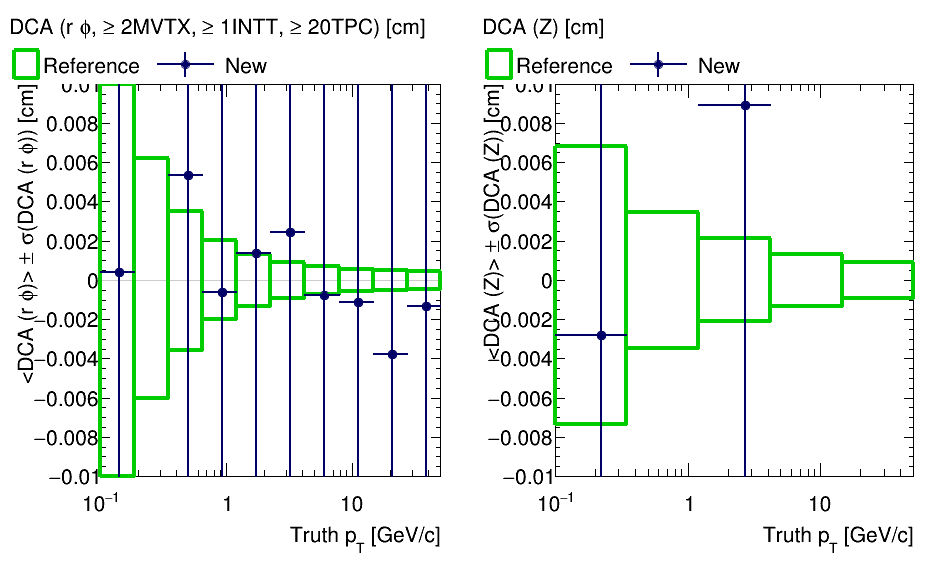

In [19]:
%%cpp

{
    const char *hist_name_prefix = "QAG4SimulationTracking";
    TString prefix = TString("h_") + hist_name_prefix + TString("_");
    
    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  if (qa_file_new)
  {

    TH1 *h_norm = (TH1 *) qa_file_new->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
  }
  if (qa_file_ref)
  {
    TH1 *h_norm = (TH1 *) qa_file_ref->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
  }

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Tracking_DCA_Resolution") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_DCA_Resolution") + TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(2, 1);
  int idx = 1;
  TPad *p;

  {
    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogx();
    TH1 *frame = p->DrawFrame(0.1, -0.01, 50, 0.01,
                              ";Truth p_{T} [GeV/c];<DCA (r #phi)> #pm #sigma(DCA (r #phi)) [cm]");
    gPad->SetLeftMargin(.2);
    frame->GetYaxis()->SetTitleOffset(2);
    TLine *l = new TLine(0.1, 0, 50, 0);
    l->SetLineColor(kGray);
    l->Draw();

    TH2 *h_QAG4SimulationTracking_DCArPhi = (TH2 *) qa_file_new->GetObjectChecked(
        prefix + "DCArPhi_pT_cuts", "TH2");
    assert(h_QAG4SimulationTracking_DCArPhi);

    h_QAG4SimulationTracking_DCArPhi->Rebin2D(20, 1);

    // h_QAG4SimulationTracking_DCArPhi->Draw("colz");
    TGraphErrors *ge_QAG4SimulationTracking_DCArPhi = FitProfile(h_QAG4SimulationTracking_DCArPhi);
    ge_QAG4SimulationTracking_DCArPhi->Draw("pe");

    TGraphErrors *h_ratio_ref = NULL;
    if (qa_file_ref)
    {
      TH2 *h_QAG4SimulationTracking_DCArPhi = (TH2 *) qa_file_ref->GetObjectChecked(
          prefix + "DCArPhi_pT_cuts", "TH2");
      assert(h_QAG4SimulationTracking_DCArPhi);

      h_QAG4SimulationTracking_DCArPhi->Rebin2D(20, 1);

      h_ratio_ref = FitProfile(h_QAG4SimulationTracking_DCArPhi);
      ge_QAG4SimulationTracking_DCArPhi->Draw("pe");
    }

    ge_QAG4SimulationTracking_DCArPhi->SetTitle("DCA (r #phi, #geq 2MVTX, #geq 1INTT, #geq 20TPC) [cm]");
    DrawReference(ge_QAG4SimulationTracking_DCArPhi, h_ratio_ref, true);
      
      SaveGraphError2CSV(ge_QAG4SimulationTracking_DCArPhi, "QAG4SimulationTracking_DCArPhi");
  }

  {
    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogx();
    TH1 *frame = p->DrawFrame(0.1, -0.01, 50, 0.01,
                              "DCA (Z) [cm];Truth p_{T} [GeV/c];<DCA (Z)> #pm #sigma(DCA (Z)) [cm]");
    // gPad->SetLeftMargin(.2);
    gPad->SetTopMargin(-1);
    frame->GetYaxis()->SetTitleOffset(1.7);
    //TLine *l = new TLine(0.1, 0, 50, 0);
    //l->SetLineColor(kGray);
    //l->Draw();
    HorizontalLine(gPad, 1)->Draw();

    TH2 *h_QAG4SimulationTracking_DCAZ = (TH2 *) qa_file_new->GetObjectChecked(
        prefix + "DCAZ_pT_cuts", "TH2");
    assert(h_QAG4SimulationTracking_DCAZ);

    h_QAG4SimulationTracking_DCAZ->Rebin2D(40, 1);

    TGraphErrors *ge_QAG4SimulationTracking_DCAZ = FitProfile(h_QAG4SimulationTracking_DCAZ);
    ge_QAG4SimulationTracking_DCAZ->Draw("pe");
    ge_QAG4SimulationTracking_DCAZ->SetTitle("DCA (Z) [cm]");

    TGraphErrors *h_ratio_ref = NULL;
    if (qa_file_ref)
    {
      TH2 *h_QAG4SimulationTracking_DCAZ = (TH2 *) qa_file_ref->GetObjectChecked(
          prefix + "DCAZ_pT_cuts", "TH2");
      assert(h_QAG4SimulationTracking_DCAZ);

      h_QAG4SimulationTracking_DCAZ->Rebin2D(40, 1);

      h_ratio_ref = FitProfile(h_QAG4SimulationTracking_DCAZ);
      ge_QAG4SimulationTracking_DCAZ->Draw("pe");
    }

    DrawReference(ge_QAG4SimulationTracking_DCAZ, h_ratio_ref, true);
      SaveGraphError2CSV(ge_QAG4SimulationTracking_DCAZ, "QAG4SimulationTracking_DCAZ");
  }

  //SaveCanvas(c1, TString(qa_file_name_new) + TString("_") + TString(c1->GetName()), true);
    c1->Draw();
}

# Sigmalized DCA

In [20]:
%jsroot on

In [21]:
%%cpp

{
    const char *hist_name_prefix = "QAG4SimulationTracking";
  TString prefix = TString("h_") + hist_name_prefix + TString("_");

  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  if (qa_file_new)
  {
    TH1 *h_norm = (TH1 *) qa_file_new->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Truth Track"));
  }
  if (qa_file_ref)
  {
    TH1 *h_norm = (TH1 *) qa_file_ref->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Truth Track"));
  }
    
    
    
  TH2 *h_new = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("SigmalizedDCArPhi_pT"), "TH2");
  assert(h_new);

  //  h_new->Rebin(1, 2);
  //h_new->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref = NULL;
  if (qa_file_ref)
  {
    h_ref = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("SigmalizedDCArPhi_pT"), "TH2");
    assert(h_ref);

    //    h_ref->Rebin(1, 2);
    //h_ref->Sumw2();
    h_ref->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Tracking_SigmalizedDCArPhi") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_SigmalizedDCArPhi") + TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  vector<pair<double, double>> gpt_ranges{
      {0, 0.5},
      {0.5, 1},
      {1, 1.5},
      {1.5, 2},
      {2, 4},
      {4, 16},
      {16, 40}};
  TF1 *f1 = nullptr;
  TF1 *fit = nullptr;
  Double_t sigma = 0;
  Double_t sigma_unc = 0;
  char resstr[500];
  TLatex *res = nullptr;
  for (auto pt_range : gpt_ranges)
  {
    // cout << __PRETTY_FUNCTION__ << " process " << pt_range.first << " - " << pt_range.second << " GeV/c";

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new->GetXaxis()->FindBin(pt_range.first + epsilon);
    const int bin_end = h_new->GetXaxis()->FindBin(pt_range.second - epsilon);

    TH1 *h_proj_new = h_new->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new->GetName(), bin_start, bin_end),
        bin_start, bin_end);
    h_proj_new->GetXaxis()->SetRangeUser(-5.,5.);
    h_proj_new->Rebin(5);
    h_proj_new->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f GeV/c", pt_range.first, pt_range.second));
    h_proj_new->GetXaxis()->SetTitle(TString::Format(
        "Sigmalized DCA (r #phi)"));
    h_proj_new->GetXaxis()->SetNdivisions(5,5);

    f1 = new TF1("f1","gaus",-4.,4.);
    h_proj_new->Fit(f1, "mq");
    sigma = f1->GetParameter(2);
    sigma_unc = f1->GetParError(2);
    
    TH1 *h_proj_ref = nullptr;
    if (h_ref)
    {
      h_proj_ref =
          h_ref->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new->GetName(), bin_start, bin_end),
              bin_start, bin_end);
      //h_proj_ref->GetXaxis()->SetRangeUser(-.05,.05);
      h_proj_ref->Rebin(5);
    }
    
    DrawReference(h_proj_new, h_proj_ref);
    sprintf(resstr,"#sigma = %.5f #pm %.5f", sigma, sigma_unc);
    res = new TLatex(0.325,0.825,resstr);
    res->SetNDC();
    res->SetTextSize(0.05);
    res->SetTextAlign(13);
    res->Draw();
  }
  p = (TPad *) c1->cd(idx++);
  c1->Update();
  TPaveText *pt = new TPaveText(.05,.1,.95,.8);
  pt->AddText("Cuts: MVTX hits>=2, INTT hits>=1,");
  pt->AddText("TPC hits>=20");
  pt->Draw();

  // SaveCanvas(c1, TString(qa_file_name_new) + TString("_") + TString(c1->GetName()), true);
  c1->Draw();
}

KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))


In [22]:
%%cpp

{
    const char *hist_name_prefix = "QAG4SimulationTracking";
  TString prefix = TString("h_") + hist_name_prefix + TString("_");

  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  if (qa_file_new)
  {
    TH1 *h_norm = (TH1 *) qa_file_new->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Truth Track"));
  }
  if (qa_file_ref)
  {
    TH1 *h_norm = (TH1 *) qa_file_ref->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Truth Track"));
  }
    
    
    
  TH2 *h_new = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("SigmalizedDCArPhi_pT"), "TH2");
  assert(h_new);

  //  h_new->Rebin(1, 2);
  //h_new->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref = NULL;
  if (qa_file_ref)
  {
    h_ref = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("SigmalizedDCArPhi_pT"), "TH2");
    assert(h_ref);

    //    h_ref->Rebin(1, 2);
    //h_ref->Sumw2();
    h_ref->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Tracking_SigmalizedDCArPhi") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_SigmalizedDCArPhi") + TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  vector<pair<double, double>> gpt_ranges{
      {0, 0.5},
      {0.5, 1},
      {1, 1.5},
      {1.5, 2},
      {2, 4},
      {4, 16},
      {16, 40}};
  TF1 *f1 = nullptr;
  TF1 *fit = nullptr;
  Double_t sigma = 0;
  Double_t sigma_unc = 0;
  char resstr[500];
  TLatex *res = nullptr;
  for (auto pt_range : gpt_ranges)
  {
    // cout << __PRETTY_FUNCTION__ << " process " << pt_range.first << " - " << pt_range.second << " GeV/c";

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new->GetXaxis()->FindBin(pt_range.first + epsilon);
    const int bin_end = h_new->GetXaxis()->FindBin(pt_range.second - epsilon);

    TH1 *h_proj_new = h_new->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new->GetName(), bin_start, bin_end),
        bin_start, bin_end);
    h_proj_new->GetXaxis()->SetRangeUser(-5.,5.);
    h_proj_new->Rebin(5);
    h_proj_new->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f GeV/c", pt_range.first, pt_range.second));
    h_proj_new->GetXaxis()->SetTitle(TString::Format(
        "Sigmalized DCA (r #phi)"));
    h_proj_new->GetXaxis()->SetNdivisions(5,5);

    f1 = new TF1("f1","gaus",-4.,4.);
    h_proj_new->Fit(f1, "mq");
    sigma = f1->GetParameter(2);
    sigma_unc = f1->GetParError(2);
    
    TH1 *h_proj_ref = nullptr;
    if (h_ref)
    {
      h_proj_ref =
          h_ref->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new->GetName(), bin_start, bin_end),
              bin_start, bin_end);
      //h_proj_ref->GetXaxis()->SetRangeUser(-.05,.05);
      h_proj_ref->Rebin(5);
    }
    
    DrawReference(h_proj_new, h_proj_ref);
    sprintf(resstr,"#sigma = %.5f #pm %.5f", sigma, sigma_unc);
    res = new TLatex(0.325,0.825,resstr);
    res->SetNDC();
    res->SetTextSize(0.05);
    res->SetTextAlign(13);
    res->Draw();
  }
  p = (TPad *) c1->cd(idx++);
  c1->Update();
  TPaveText *pt = new TPaveText(.05,.1,.95,.8);
  pt->AddText("Cuts: MVTX hits>=2, INTT hits>=1,");
  pt->AddText("TPC hits>=20");
  pt->Draw();

  // SaveCanvas(c1, TString(qa_file_name_new) + TString("_") + TString(c1->GetName()), true);
  c1->Draw();
}

KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))
KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: QA_Draw_Tracking_SigmalizedDCArPhi_QAG4SimulationTracking


## Longitudinal DCA, $DCA_z/\sigma[DCA_z]$

In [23]:
%%cpp

{
    
    const char *hist_name_prefix = "QAG4SimulationTracking";
  TString prefix = TString("h_") + hist_name_prefix + TString("_");

  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  if (qa_file_new)
  {
    TH1 *h_norm = (TH1 *) qa_file_new->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Truth Track"));
  }
  if (qa_file_ref)
  {
    TH1 *h_norm = (TH1 *) qa_file_ref->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Truth Track"));
  }
    
  TH2 *h_new2 = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("SigmalizedDCAZ_pT"), "TH2");
  assert(h_new2);

  //  h_new->Rebin(1, 2);
  //h_new2->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref2 = NULL;
  if (qa_file_ref)
  {
    h_ref2 = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("SigmalizedDCAZ_pT"), "TH2");
    assert(h_ref2);

    //    h_ref->Rebin(1, 2);
    //h_ref2->Sumw2();
    h_ref2->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c2 = new TCanvas(TString("QA_Draw_Tracking_SigmalizedDCAZ") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_SigmalizedDCAZ") + TString("_") + hist_name_prefix,
                            950, 600);
  c2->Divide(4, 2);
  int idx2 = 1;
  TPad *p2;

  vector<pair<double, double>> gpt_ranges2{
      {0, 0.5},
      {0.5, 1},
      {1, 1.5},
      {1.5, 2},
      {2, 4},
      {4, 16},
      {16, 40}};
  TF1 *f2 = nullptr;
  TF1 *fit2 = nullptr;
  Double_t sigma2 = 0;
  Double_t sigma_unc2 = 0;
  char resstr2[500];
  TLatex *res2 = nullptr;
  for (auto pt_range : gpt_ranges2)
  {
   // cout << __PRETTY_FUNCTION__ << " process " << pt_range.first << " - " << pt_range.second << " GeV/c";

    p2 = (TPad *) c2->cd(idx2++);
    c2->Update();
    p2->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new2->GetXaxis()->FindBin(pt_range.first + epsilon);
    const int bin_end = h_new2->GetXaxis()->FindBin(pt_range.second - epsilon);

    TH1 *h_proj_new2 = h_new2->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new2->GetName(), bin_start, bin_end),
        bin_start, bin_end);
    h_proj_new2->GetXaxis()->SetRangeUser(-5.,5.);
    h_proj_new2->Rebin(5);
    h_proj_new2->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f GeV/c", pt_range.first, pt_range.second));
    h_proj_new2->GetXaxis()->SetTitle(TString::Format(
        "Sigmalized DCA (Z)"));
    h_proj_new2->GetXaxis()->SetNdivisions(5,5);
    
    f2 = new TF1("f2","gaus",-4.,4.);
    h_proj_new2->Fit(f2, "mq");
    sigma2 = f2->GetParameter(2);
    sigma_unc2 = f2->GetParError(2);

    TH1 *h_proj_ref2 = nullptr;
    if (h_ref2)
    {
      h_proj_ref2 =
          h_ref2->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new2->GetName(), bin_start, bin_end),
              bin_start, bin_end);
      //h_proj_ref->GetXaxis()->SetRangeUser(-.05,.05);
      h_proj_ref2->Rebin(5);
    }
    DrawReference(h_proj_new2, h_proj_ref2);
    sprintf(resstr2,"#sigma = %.5f #pm %.5f", sigma2, sigma_unc2);
    res2 = new TLatex(0.325,0.825,resstr2);
    res2->SetNDC();
    res2->SetTextSize(0.05);
    res2->SetTextAlign(13);
    res2->Draw();
  }
  p2 = (TPad *) c2->cd(idx2++);
  c2->Update();
  TPaveText *pt2 = new TPaveText(.05,.1,.95,.8);
  pt2->AddText("Cuts: MVTX hits>=2, INTT hits>=1,");
  pt2->AddText("TPC hits>=20");
  pt2->Draw();

  //SaveCanvas(c2, TString(qa_file_name_new) + TString("_") + TString(c2->GetName()), true);
    c2->Draw();
}

## Sigmalized DCA summaries

With tracker hit cuts (>=2MVTX, >=1INTT, >=20TPC)


In [24]:
%jsroot off

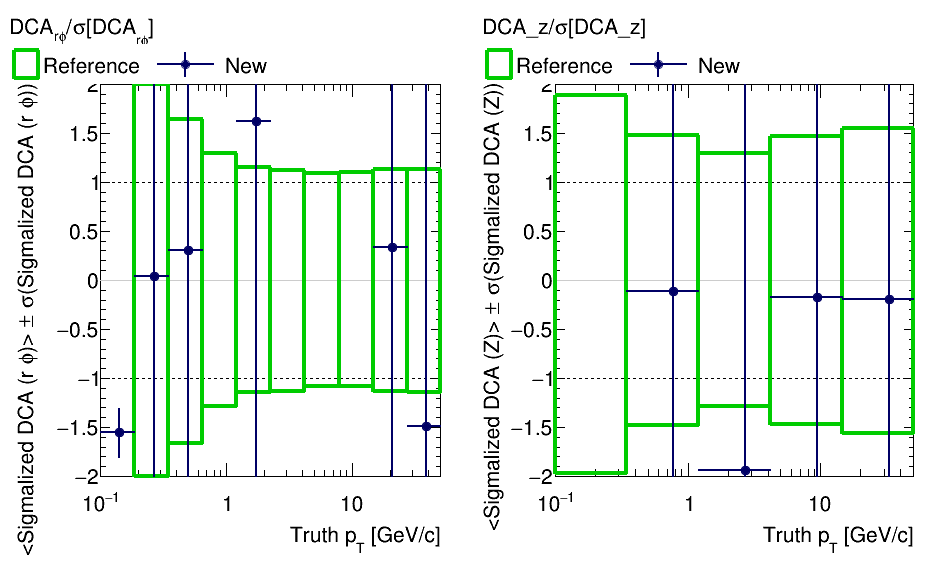

In [25]:
%%cpp
 
{
    const char *hist_name_prefix = "QAG4SimulationTracking";
    TString prefix = TString("h_") + hist_name_prefix + TString("_");
    
    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  if (qa_file_new)
  {

    TH1 *h_norm = (TH1 *) qa_file_new->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
  }
  if (qa_file_ref)
  {
    TH1 *h_norm = (TH1 *) qa_file_ref->GetObjectChecked(
        prefix + TString("Normalization"), "TH1");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
  }

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Tracking_SigmalizedDCA_Resolution") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_SigmalizedDCA_Resolution") + TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(2, 1);
  int idx = 1;
  TPad *p;

  {
    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogx();
    TH1 *frame = p->DrawFrame(0.1, -2, 50, 2,
                              ";Truth p_{T} [GeV/c];<Sigmalized DCA (r #phi)> #pm #sigma(Sigmalized DCA (r #phi))");
    gPad->SetLeftMargin(.2);
    frame->GetYaxis()->SetTitleOffset(2);
    TLine *l = new TLine(0.1, 0, 50, 0);
    l->SetLineColor(kGray);
    l->Draw();
    HorizontalLine(gPad, 1)->Draw();
    HorizontalLine(gPad, -1)->Draw();

    TH2 *h_QAG4SimulationTracking_DCArPhi = (TH2 *) qa_file_new->GetObjectChecked(
        prefix + "SigmalizedDCArPhi_pT", "TH2");
    assert(h_QAG4SimulationTracking_DCArPhi);

    h_QAG4SimulationTracking_DCArPhi->Rebin2D(20, 1);

    // h_QAG4SimulationTracking_DCArPhi->Draw("colz");
    TGraphErrors *ge_QAG4SimulationTracking_DCArPhi = FitProfile(h_QAG4SimulationTracking_DCArPhi);
    ge_QAG4SimulationTracking_DCArPhi->Draw("pe");

    TGraphErrors *h_ratio_ref = NULL;
    if (qa_file_ref)
    {
      TH2 *h_QAG4SimulationTracking_DCArPhi = (TH2 *) qa_file_ref->GetObjectChecked(
          prefix + "SigmalizedDCArPhi_pT", "TH2");
      assert(h_QAG4SimulationTracking_DCArPhi);

      h_QAG4SimulationTracking_DCArPhi->Rebin2D(20, 1);

      h_ratio_ref = FitProfile(h_QAG4SimulationTracking_DCArPhi);
      ge_QAG4SimulationTracking_DCArPhi->Draw("pe");
    }

    ge_QAG4SimulationTracking_DCArPhi->SetTitle("DCA_{r#phi}/#sigma[DCA_{r#phi}]");
    DrawReference(ge_QAG4SimulationTracking_DCArPhi, h_ratio_ref, true);
  }

  {
    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogx();
    TH1 *frame = p->DrawFrame(0.1, -2, 50, 2,
                              "DCA_z/#sigma[DCA_z];Truth p_{T} [GeV/c];<Sigmalized DCA (Z)> #pm #sigma(Sigmalized DCA (Z))");
    // gPad->SetLeftMargin(.2);
    gPad->SetTopMargin(-1);
    frame->GetYaxis()->SetTitleOffset(1.7);
    TLine *l = new TLine(0.1, 0, 50, 0);
    l->SetLineColor(kGray);
    l->Draw();
    HorizontalLine(gPad, 1)->Draw();
    HorizontalLine(gPad, -1)->Draw();

    TH2 *h_QAG4SimulationTracking_DCAZ = (TH2 *) qa_file_new->GetObjectChecked(
        prefix + "SigmalizedDCAZ_pT", "TH2");
    assert(h_QAG4SimulationTracking_DCAZ);

    h_QAG4SimulationTracking_DCAZ->Rebin2D(40, 1);

    TGraphErrors *ge_QAG4SimulationTracking_DCAZ = FitProfile(h_QAG4SimulationTracking_DCAZ);
    ge_QAG4SimulationTracking_DCAZ->Draw("pe");
    ge_QAG4SimulationTracking_DCAZ->SetTitle("DCA_z/#sigma[DCA_z]");

    TGraphErrors *h_ratio_ref = NULL;
    if (qa_file_ref)
    {
      TH2 *h_QAG4SimulationTracking_DCAZ = (TH2 *) qa_file_ref->GetObjectChecked(
          prefix + "SigmalizedDCAZ_pT", "TH2");
      assert(h_QAG4SimulationTracking_DCAZ);

      h_QAG4SimulationTracking_DCAZ->Rebin2D(40, 1);

      h_ratio_ref = FitProfile(h_QAG4SimulationTracking_DCAZ);
      ge_QAG4SimulationTracking_DCAZ->Draw("pe");
    }

    DrawReference(ge_QAG4SimulationTracking_DCAZ, h_ratio_ref, true);
  }

  //SaveCanvas(c1, TString(qa_file_name_new) + TString("_") + TString(c1->GetName()), true);
    c1->Draw();
}

# Vertexing

## Number of tracks associated

Tracks assocaition with vertex. `gntrack` are truth tracks associated with the vertex and `ntrack` are reconstructed tracks

In [26]:
%jsroot on

In [27]:
%%cpp
{
    const char *hist_name_prefix = "QAG4SimulationVertex_SvtxVertexMap";
    TString prefix = TString("h_") + hist_name_prefix + TString("_");
    
    
  TCanvas *c1 = new TCanvas(TString("QA_Draw_Vertex_nVertex") +
                                TString("_") + hist_name_prefix,
                            TString("QA_Draw_Vertex_nVertex") +
                                TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(2, 2);
  int idx = 1;
  TPad *p;

  {
    static const int nrebin = 1;

    p = (TPad *)c1->cd(idx++);
    c1->Update();
    // p->SetLogx();
    p->SetGridy();

    TH1 *h_pass =
        (TH1 *)qa_file_new->GetObjectChecked(prefix + "gntracks", "TH1");
    assert(h_pass);

    h_pass->Rebin(nrebin);

    //    h_ratio->GetXaxis()->SetRangeUser(min_Et, max_Et);
    h_pass->GetYaxis()->SetTitle("Counts");
    // h_pass->GetYaxis()->SetRangeUser(-0, 1.);

    TH1 *h_ref = NULL;
    if (qa_file_ref) {
      h_ref =
          (TH1 *)qa_file_ref->GetObjectChecked(prefix + "gntracks", "TH1");
      assert(h_ref);

      h_ref->Rebin(nrebin);
    }

    h_pass->SetTitle(TString(hist_name_prefix) + ": gntracks");

    DrawReference(h_pass, h_ref, false);
  }

  {
    static const int nrebin = 1;
    
    p = (TPad *)c1->cd(idx++);
    c1->Update();
    // p->SetLogx();
    p->SetGridy();

    TH1 *h_pass =
        (TH1 *)qa_file_new->GetObjectChecked(prefix + "gntracksmaps", "TH1");
    assert(h_pass);

    h_pass->Rebin(nrebin);

    //    h_ratio->GetXaxis()->SetRangeUser(min_Et, max_Et);
    h_pass->GetYaxis()->SetTitle("Counts");
    // h_pass->GetYaxis()->SetRangeUser(-0, 1.);

    TH1 *h_ref = NULL;
    if (qa_file_ref) {
      h_ref =
          (TH1 *)qa_file_ref->GetObjectChecked(prefix + "gntracksmaps", "TH1");
      assert(h_pass);

      h_ref->Rebin(nrebin);
    }

    h_pass->SetTitle(TString(hist_name_prefix) + ": gntracksmaps");

    DrawReference(h_pass, h_ref, false);
  }

  {
    static const int nrebin = 1;
    
    p = (TPad *)c1->cd(idx++);
    c1->Update();
    // p->SetLogx();
    p->SetGridy();

    TH1 *h_pass =
        (TH1 *)qa_file_new->GetObjectChecked(prefix + "ntracks", "TH1");
    assert(h_pass);

    h_pass->Rebin(nrebin);

    //    h_ratio->GetXaxis()->SetRangeUser(min_Et, max_Et);
    h_pass->GetYaxis()->SetTitle("Counts");
    // h_pass->GetYaxis()->SetRangeUser(-0, 1.);

    TH1 *h_ref = NULL;
    if (qa_file_ref) {
      h_ref =
          (TH1 *)qa_file_ref->GetObjectChecked(prefix + "ntracks", "TH1");
      assert(h_pass);

      h_ref->Rebin(nrebin);
    }

    h_pass->SetTitle(TString(hist_name_prefix) + ": ntracks");

    DrawReference(h_pass, h_ref, false);
  }

  {
    static const int nrebin = 1;
    
    p = (TPad *)c1->cd(idx++);
    c1->Update();
    // p->SetLogx();
    p->SetGridy();

    TH1 *h_pass =
        (TH1 *)qa_file_new->GetObjectChecked(prefix + "ntracks_cuts", "TH1");
    assert(h_pass);

    h_pass->Rebin(nrebin);

    //    h_ratio->GetXaxis()->SetRangeUser(min_Et, max_Et);
    h_pass->GetYaxis()->SetTitle("Counts");
    // h_pass->GetYaxis()->SetRangeUser(-0, 1.);

    TH1 *h_ref = NULL;
    if (qa_file_ref) {
      h_ref =
          (TH1 *)qa_file_ref->GetObjectChecked(prefix + "ntracks_cuts", "TH1");
      assert(h_pass);

      h_ref->Rebin(nrebin);
    }

    h_pass->SetTitle(TString(hist_name_prefix) + ": ntracks (#geq 2 MVTX)");

    DrawReference(h_pass, h_ref, false);
  }

 // SaveCanvas(c1,
 //            TString(qa_file_name_new) + TString("_") + TString(c1->GetName()),
 //            true);
    
    c1->Draw();
}

KSTestSummary::PushKSTest - Warning - received pValue = 0. Reset to an arbitary small non-zero value (e^(-15))


Error in <TH1F::KolmogorovTest>: Histogram1 h_QAG4SimulationVertex_SvtxVertexMap_ntracks_cuts integral is zero



## Vertex resolution

In [28]:
%%cpp
{
    const char *hist_name_prefix = "QAG4SimulationVertex_SvtxVertexMap";
    TString prefix = TString("h_") + hist_name_prefix + TString("_");
    
    
  // X-direction

  TH2 *h_new = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("vxRes_gvz"), "TH2");
  assert(h_new);

  // h_new->Rebin2D(1, 5);
  //h_new->Sumw2();
  // h_new->GetXaxis()->SetRangeUser(-15,15);
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref = NULL;
  if (qa_file_ref)
  {
    h_ref = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("vxRes_gvz"), "TH2");
    assert(h_ref);

    // h_ref->Rebin2D(1, 5);
    //h_ref->Sumw2();
    // h_ref->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Vertex_Resolution_x") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Vertex_Resolution_x") + TString("_") + hist_name_prefix,
                            950, 600);
  c1->Divide(2,1);
  int idx = 1;
  TPad *p;

  vector<pair<double, double>> gvz_ranges{
      {-10.0, 10.0}};
  TF1 *f1 = nullptr;
  TF1 *fit = nullptr;
  Double_t sigma = 0;
  Double_t sigma_unc = 0;
  char resstr[500];
  TLatex *res = nullptr;
  for (auto gvz_range : gvz_ranges)
  {
   // cout << __PRETTY_FUNCTION__ << " process " << gvz_range.first << " - " << gvz_range.second << " cm";

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    // p->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new->GetXaxis()->FindBin(gvz_range.first + epsilon);
    const int bin_end = h_new->GetXaxis()->FindBin(gvz_range.second - epsilon);

    TH1 *h_proj_new = h_new->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new->GetName(), bin_start, bin_end));
	// bin_start, bin_end);

    h_proj_new->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f cm - gvz", gvz_range.first, gvz_range.second));
    h_proj_new->GetXaxis()->SetTitle(TString::Format(
        "Vertex Resolution (x) [cm]"));
    h_proj_new->GetXaxis()->SetNdivisions(5,5);
    h_proj_new->GetXaxis()->SetRangeUser(-0.002,0.002);

    f1 = new TF1("f1","gaus",-.002,.002);
    h_proj_new->Fit(f1, "qm");
    sigma = f1->GetParameter(2);
    sigma_unc = f1->GetParError(2);


    TH1 *h_proj_ref = nullptr;
    if (h_ref)
    {
      h_proj_ref =
          h_ref->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new->GetName(), bin_start, bin_end));
              // bin_start, bin_end);
      h_proj_ref->GetXaxis()->SetRangeUser(-10,10);
    }
    
    DrawReference(h_proj_new, h_proj_ref);
    sprintf(resstr,"#sigma = %.5f #pm %.5f cm", sigma, sigma_unc);
    res = new TLatex(0.325,0.825,resstr);
    res->SetNDC();
    res->SetTextSize(0.05);
    res->SetTextAlign(13);
    res->Draw();
  }
  p = (TPad *) c1->cd(idx++);
  c1->Update();
  gPad->SetLeftMargin(.2);
  //h_new->GetYaxis()->SetTitleOffset(2);
  h_new->Draw("colz");
  

//  SaveCanvas(c1, TString(qa_file_name_new) + TString("_") + TString(c1->GetName()), true);
    c1->Draw();

  // Y-direction

  TH2 *h_new2 = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("vyRes_gvz"), "TH2");
  assert(h_new2);

  //  h_new->Rebin(1, 2);
  //h_new2->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref2 = NULL;
  if (qa_file_ref)
  {
    h_ref2 = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("vyRes_gvz"), "TH2");
    assert(h_ref2);

    // h_ref->Rebin(1, 2);
    //h_ref2->Sumw2();
    // h_ref->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c2 = new TCanvas(TString("QA_Draw_Vertex_Resolution_y") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Vertex_Resolution_y") + TString("_") + hist_name_prefix,
                            950, 600);
  c2->Divide(2,1);
  int idx2 = 1;
  TPad *p2;

  vector<pair<double, double>> gvz_ranges2{
      {-10.0, 10.0}};
  TF1 *f2 = nullptr;
  TF1 *fit2 = nullptr;
  Double_t sigma2 = 0;
  Double_t sigma_unc2 = 0;
  char resstr2[500];
  TLatex *res2 = nullptr;
  for (auto gvz_range : gvz_ranges2)
  {
    //cout << __PRETTY_FUNCTION__ << " process " << gvz_range.first << " - " << gvz_range.second << " cm";

    p2 = (TPad *) c2->cd(idx2++);
    c2->Update();
    // p->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new2->GetXaxis()->FindBin(gvz_range.first + epsilon);
    const int bin_end = h_new2->GetXaxis()->FindBin(gvz_range.second - epsilon);

    TH1 *h_proj_new2 = h_new2->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new2->GetName(), bin_start, bin_end),
        bin_start, bin_end);

    h_proj_new2->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f cm - gvz", gvz_range.first, gvz_range.second));
    h_proj_new2->GetXaxis()->SetTitle(TString::Format(
        "Vertex Resolution (y) [cm]"));
    h_proj_new2->GetXaxis()->SetNdivisions(5,5);
    h_proj_new2->GetXaxis()->SetRangeUser(-0.002,0.002);
    
    f2 = new TF1("f2","gaus",-.002,.002);
    h_proj_new2->Fit(f2,  "qm");
    sigma2 = f2->GetParameter(2);
    sigma_unc2 = f2->GetParError(2);

    TH1 *h_proj_ref2 = nullptr;
    if (h_ref2)
    {
      h_proj_ref2 =
          h_ref2->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new2->GetName(), bin_start, bin_end),
              bin_start, bin_end);
    }
    
    DrawReference(h_proj_new2, h_proj_ref2);
    sprintf(resstr2,"#sigma = %.5f #pm %.5f cm", sigma2, sigma_unc2);
    res2 = new TLatex(0.325,0.825,resstr2);
    res2->SetNDC();
    res2->SetTextSize(0.05);
    res2->SetTextAlign(13);
    res2->Draw();
  }
  p2 = (TPad *) c2->cd(idx2++);
  c2->Update();
  gPad->SetLeftMargin(.2);
  //h_new2->GetYaxis()->SetTitleOffset(2);
  h_new2->Draw("colz");

  //SaveCanvas(c2, TString(qa_file_name_new) + TString("_") + TString(c2->GetName()), true);
    c2->Draw();
    
  // Z-direction

  TH2 *h_new3 = (TH2 *) qa_file_new->GetObjectChecked(
      prefix + TString("vzRes_gvz"), "TH2");
  assert(h_new3);

  //  h_new->Rebin(1, 2);
  //h_new3->Sumw2();
  //  h_new->Scale(1. / Nevent_new);

  TH2 *h_ref3 = NULL;
  if (qa_file_ref)
  {
    h_ref3 = (TH2 *) qa_file_ref->GetObjectChecked(
        prefix + TString("vzRes_gvz"), "TH2");
    assert(h_ref3);

    // h_ref->Rebin(1, 2);
    //h_ref3->Sumw2();
    // h_ref->Scale(Nevent_new / Nevent_ref);
  }

  TCanvas *c3 = new TCanvas(TString("QA_Draw_Vertex_Resolution_z") + TString("_") + hist_name_prefix,
                            TString("QA_Draw_Vertex_Resolution_z") + TString("_") + hist_name_prefix,
                            950, 600);
  c3->Divide(2,1);
  int idx3 = 1;
  TPad *p3;

  vector<pair<double, double>> gvz_ranges3{
      {-10.0, 10.0}};
  TF1 *f3 = nullptr;
  TF1 *fit3 = nullptr;
  Double_t sigma3 = 0;
  Double_t sigma_unc3 = 0;
  char resstr3[500];
  TLatex *res3 = nullptr;
  for (auto gvz_range : gvz_ranges3)
  {
   // cout << __PRETTY_FUNCTION__ << " process " << gvz_range.first << " - " << gvz_range.second << " cm";

    p3 = (TPad *) c3->cd(idx3++);
    c3->Update();
    // p->SetLogy();

    const double epsilon = 1e-6;
    const int bin_start = h_new3->GetXaxis()->FindBin(gvz_range.first + epsilon);
    const int bin_end = h_new3->GetXaxis()->FindBin(gvz_range.second - epsilon);

    TH1 *h_proj_new3 = h_new3->ProjectionY(
        TString::Format(
            "%s_New_ProjX_%d_%d",
            h_new3->GetName(), bin_start, bin_end),
        bin_start, bin_end);

    h_proj_new3->SetTitle(TString(hist_name_prefix) + TString::Format(
                                                         ": %.1f - %.1f cm -gvz", gvz_range.first, gvz_range.second));
    h_proj_new3->GetXaxis()->SetTitle(TString::Format(
        "Vertex Resolution (z) [cm]"));
    h_proj_new3->GetXaxis()->SetNdivisions(5,5);
    h_proj_new3->GetXaxis()->SetRangeUser(-0.002,0.002);
    
    f3 = new TF1("f3","gaus",-.002,.002);
    h_proj_new3->Fit(f3,  "qm");
    sigma3 = f3->GetParameter(2);
    sigma_unc3 = f3->GetParError(2);

    TH1 *h_proj_ref3 = nullptr;
    if (h_ref3)
    {
      h_proj_ref3 =
          h_ref3->ProjectionY(
              TString::Format(
                  "%s_Ref_ProjX_%d_%d",
                  h_new3->GetName(), bin_start, bin_end),
              bin_start, bin_end);
    }
    
    DrawReference(h_proj_new3, h_proj_ref3);
    sprintf(resstr3,"#sigma = %.5f #pm %.5f cm", sigma3, sigma_unc3);
    res3 = new TLatex(0.325,0.825,resstr3);
    res3->SetNDC();
    res3->SetTextSize(0.05);
    res3->SetTextAlign(13);
    res3->Draw();
  }
  p3 = (TPad *) c3->cd(idx3++);
  c3->Update();
  gPad->SetLeftMargin(.2);
  //h_new3->GetYaxis()->SetTitleOffset(2);
  h_new3->Draw("colz");

//  SaveCanvas(c3, TString(qa_file_name_new) + TString("_") + TString(c3->GetName()), true);
    c3->Draw();
}

## Vertex resolution w/ multiplicity dependence

To be completed

# Summary statistics

In [29]:
%%cpp

KSTestSummary::getInstance()->make_summary_txt("QA-vertexing.txt");

This notebook contains 56 KSTets: combined Chi2/nDoF = 1916.01 / 112, and combined __p-Value = 0__


In [30]:
%%cpp

KSTestSummary::getInstance()->make_summary_TCanvas() -> Draw();